In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

df=pd.DataFrame()

In [3]:
df = pd.read_csv(r"C:/Major Project/Python/IT.csv",index_col='periods',parse_dates=True)
# df.index.freq = 'AS'

In [7]:
df.tail()

,publications,journals,books,conferences,patents,copyrights
periods,,,,,,
2010-01-01,12,7,0,5,0,0
2009-01-01,2,0,0,2,0,0
2008-01-01,1,1,0,0,0,0
2007-01-01,0,0,0,0,0,0
2006-01-01,2,0,0,2,0,0


In [9]:
df.columns = ['publications']
df.plot(figsize=(12,8))

ValueError: Length mismatch: Expected axis has 6 elements, new values have 1 elements

In [ ]:
df['citations_1yearback']=df['citations'].shift(+1)
df['citations_2yearsback']=df['citations'].shift(+2)
df['citations_3yearsback']=df['citations'].shift(+3)
df

,citations,citations_1yearback,citations_2yearsback,citations_3yearsback
year,,,,
2005-01-01,15.0,NaN,NaN,NaN
2006-01-01,2.0,15.0,NaN,NaN
2007-01-01,0.0,2.0,15.0,NaN
2008-01-01,1.0,0.0,2.0,15.0
2009-01-01,2.0,1.0,0.0,2.0
2010-01-01,12.0,2.0,1.0,0.0
2011-01-01,17.0,12.0,2.0,1.0
2012-01-01,21.0,17.0,12.0,2.0
2013-01-01,11.0,21.0,17.0,12.0


In [ ]:
df=df.dropna()
df

,citations,citations_1yearback,citations_2yearsback,citations_3yearsback
year,,,,
2008-01-01,1.0,0.0,2.0,15.0
2009-01-01,2.0,1.0,0.0,2.0
2010-01-01,12.0,2.0,1.0,0.0
2011-01-01,17.0,12.0,2.0,1.0
2012-01-01,21.0,17.0,12.0,2.0
2013-01-01,11.0,21.0,17.0,12.0
2014-01-01,20.0,11.0,21.0,17.0
2015-01-01,40.0,20.0,11.0,21.0
2016-01-01,65.0,40.0,20.0,11.0


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [ ]:
import numpy as np
x1,x2,x3,y=df['citations_1yearback'],df['citations_2yearsback'],df['citations_3yearsback'],df['citations']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  0.   2.  15.]
 [  1.   0.   2.]
 [  2.   1.   0.]
 [ 12.   2.   1.]
 [ 17.  12.   2.]
 [ 21.  17.  12.]
 [ 11.  21.  17.]
 [ 20.  11.  21.]
 [ 40.  20.  11.]
 [ 65.  40.  20.]
 [ 49.  65.  40.]
 [ 74.  49.  65.]
 [101.  74.  49.]
 [101. 101.  74.]
 [137. 101. 101.]
 [ 74. 137. 101.]
 [ 72.  74. 137.]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:15],final_x[15:],y[:15],y[15:]

In [ ]:
X_train

array([[  0.,   2.,  15.],
       [  1.,   0.,   2.],
       [  2.,   1.,   0.],
       [ 12.,   2.,   1.],
       [ 17.,  12.,   2.],
       [ 21.,  17.,  12.],
       [ 11.,  21.,  17.],
       [ 20.,  11.,  21.],
       [ 40.,  20.,  11.],
       [ 65.,  40.,  20.],
       [ 49.,  65.,  40.],
       [ 74.,  49.,  65.],
       [101.,  74.,  49.],
       [101., 101.,  74.],
       [137., 101., 101.]])

In [ ]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

c:\python 310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

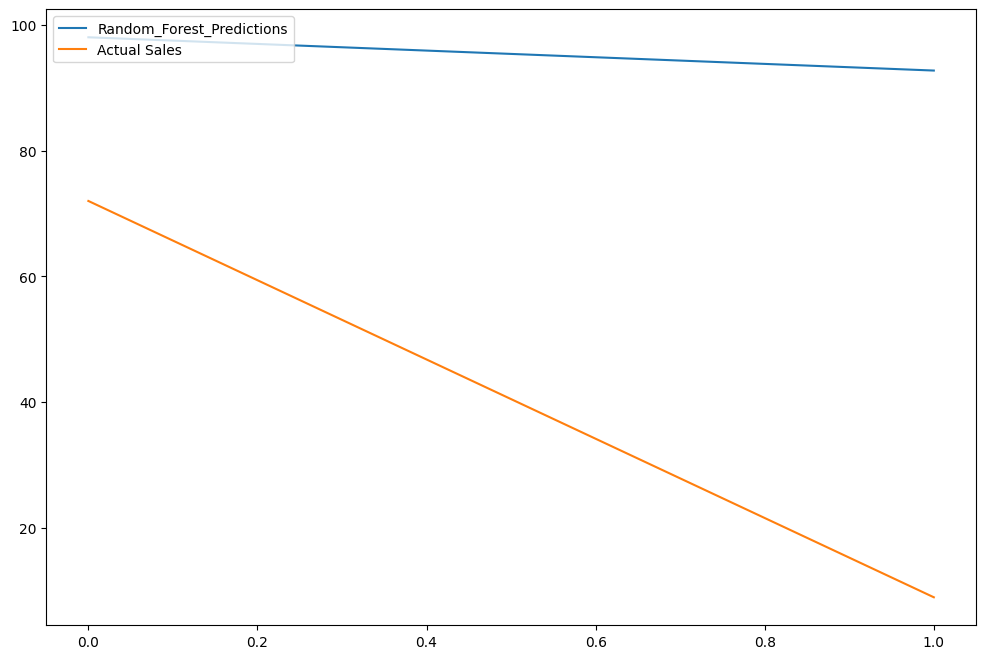

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

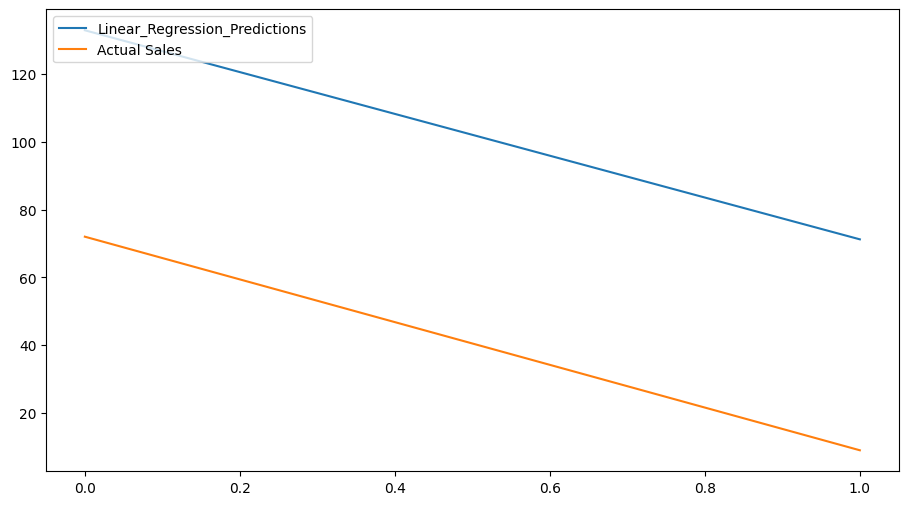

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
df=df.reset_index()
# print(df["periods"])
X_train=df['periods']
y_train=df['publications']
model.fit(X_train,y_train)
# y_pred = model.predict(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[1.6725312e+18 1.6409952e+18 1.6094592e+18 1.5778368e+18 1.5463008e+18
 1.5147648e+18 1.4832288e+18 1.4516064e+18 1.4200704e+18 1.3885344e+18
 1.3569984e+18 1.3253760e+18 1.2938400e+18 1.2623040e+18 1.2307680e+18
 1.1991456e+18 1.1676096e+18 1.1360736e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(y_pred,label='Logistic_Regression_Predictions')
plt.plot(y_test,label='Actual Publications')
plt.legend(loc="upper left")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)


Mean Squared Error for Random Forest Model is: 61.99900523395517
Mean Squared Error for Linear Regression Model is: 61.55218805040142
